# Algoritmo de agrupamiento para la segmentación de tiendas

## Contexto

En el mundo competitivo de hoy, es crucial comprender el comportamiento de las tiendas y categorizar a los clientes según su demografía y comportamiento de compra.

## Objetivo

Este proyecto demuestra el concepto de segmentación de un conjunto de datos que pertenecen a tiendas Walmart con el producto café utilizando agrupación de k-means en Python. El conjunto de datos contiene las ventas mensuales de los años 2019 y 2020 de 2411 tiendas así como otras características. Usaremos el algoritmo de agrupación de k-means para derivar la cantidad óptima de agrupaciones y comprender los segmentos de clientes subyacentes en función de los datos proporcionados.

## Acerca del conjunto de datos

El conjunto de datos consta de las ventas mensuales de los años 2019 y 2020 de 2411 tiendas. 

### Exploración de los datos usando bibliotecas numpy y pandas en python.

In [9]:
# Cargar los paquetes necesarios
import numpy as np
import pandas as pd
import pdpipe as pdp 
from tqdm import tqdm

# Importar estilo de trama
import matplotlib as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [10]:
# Funciones
def log_shape(df):
    """
    Tamaño del data frame.
    """
    print(f'shape = {df.shape}')
    return df

def elbow_test(df, n_init, max_clusters, max_iter):
    distortions = []
    for i in range(1, max_clusters):
        km = KMeans(
            n_clusters = i, init='random',
            n_init=n_init, max_iter=max_iter,
            tol=1e-04, random_state=20
        )
        km.fit(df)
        distortions.append(km.inertia_)
    plt.plot(range(1, max_clusters), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    kn = KneeLocator(
        range(1, max_clusters),
        distortions,
        curve='convex',
        direction='decreasing',
        interp_method='interp1d',
    )
    return kn.knee

In [11]:
# Lee el archivo csv
dataset = pd.read_csv('Cafes_Walmart.csv', index_col=None)
# Explora el conjunto de datos
log_shape(dataset)

shape = (260780, 62)


,Store Nbr,Store Name,Tramos Café,Tramos Lacteos,Tramos Baby Food,Tramos Cremadores,Tramos Leche Polvo,Tramos Cereales,Tramos Leche Liquida,Tramos Formulas Infantiles,...,Línea,Material Goup,Peso PZA,Marca,División,NSE,# Habitantes,Formato,SOM,Center Point
0,58,BA SANTA MONICA,9,10,10,4,1,6,9,1,...,Café Soluble,Nescafé Tasters Choice,0.100,Nescafé Tasters Choice,F&B,4,496,Bodega,0,0
1,58,BA SANTA MONICA,9,10,10,4,1,6,9,1,...,Café Soluble,Nescafé Tasters Choice,0.100,Nescafé Tasters Choice,F&B,4,496,Bodega,0,0
2,58,BA SANTA MONICA,9,10,10,4,1,6,9,1,...,Café Soluble,Nescafé Tasters Choice,0.100,Nescafé Tasters Choice Descafeinado,F&B,4,496,Bodega,0,0
3,58,BA SANTA MONICA,9,10,10,4,1,6,9,1,...,Café Soluble,Nescafé Tasters Choice,0.100,Nescafé Tasters Choice Descafeinado,F&B,4,496,Bodega,0,0
4,58,BA SANTA MONICA,9,10,10,4,1,6,9,1,...,Café Soluble,Nescafé Tasters Choice,0.048,Nescafé Tasters Choice,F&B,4,496,Bodega,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260775,5855,SC LAS ALAMEDAS,9,4,3,4,5,6,3,10,...,Dolce Gusto,Nescafé Dolce Gusto Cápsulas,0.189,Nescafé Dolce Gusto Cápsulas,F&B,4,1383,Hiper,0,0
260776,5855,SC LAS ALAMEDAS,9,4,3,4,5,6,3,10,...,Dolce Gusto,Nescafé Dolce Gusto Cápsulas,0.140,Nescafé Dolce Gusto Cápsulas,F&B,4,1383,Hiper,0,0
260777,5855,SC LAS ALAMEDAS,9,4,3,4,5,6,3,10,...,Dolce Gusto,Nescafé Dolce Gusto Cápsulas,0.140,Nescafé Dolce Gusto Cápsulas,F&B,4,1383,Hiper,0,0
260778,5855,SC LAS ALAMEDAS,9,4,3,4,5,6,3,10,...,PREMIUM,Nescafé Tasters Choice,0.192,Nescafé Tasters Choice,F&B,4,1383,Hiper,0,0


In [12]:
# Se calcula las sumas de las ventas por año. 
# Se han eliminado los tramos, así como Región Nescudero porque algunos registros presentan el caracter -
# Store Nbr presenta el mismo número de indentificadores que Store Name, por lo tanto se elimina.
# Expr1049 contiene lo mismo que Canal, por lo tanto se elimina.
# Material Group es igual que Marca, también se elimina.
df_ = dataset.drop(columns=['Tramos Café', 'Tramos Lacteos', 'Tramos Baby Food', 'Tramos Cremadores', 'Tramos Leche Polvo', 'Tramos Cereales', 'Tramos Leche Liquida', 'Tramos Formulas Infantiles', 'Tramos Orgánicos', 'Tramos A', 'Tramos B', 'Tramos C', 'Store Nbr', 'Región Nescuadron', 'Expr1049', 'Material Goup'])
df_["Total_2019"] = df_['2019/01']+df_['2019/02']+df_['2019/03']+df_['2019/04']+df_['2019/05']+df_['2019/06']+df_['2019/07']+df_['2019/08']+df_['2019/09']+df_['2019/10']+df_['2019/11']+df_['2019/12']
df_["Total_2020"] = df_['2020/01']+df_['2020/02']+df_['2020/03']+df_['2020/04']+df_['2020/05']+df_['2020/06']+df_['2020/07']+df_['2020/08']+df_['2020/09']
df_ = df_.drop(columns=['2019/01', '2019/02', '2019/03', '2019/04', '2019/05', '2019/06', '2019/07', '2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06', '2020/07', '2020/08', '2020/09'])
df_ = df_.reset_index().drop(columns = 'index')

In [13]:
# Se renombran algunas características, sólo se quitan acentos y espacios.
df_ = df_.rename(columns={'Región Nestlé': 'Region_Nestle', 'Data Type': 'Data_Type', 'Clasificación Store Optimizer': 'Clasificacion_Store_Optimizer', 'Categoría': 'Categoria', 'División': 'Division', 'Store Name': 'Store_Name', 'Center Point': 'Center_Point', 'Línea': 'Linea'})
log_shape(df_)
sample = df_

shape = (260780, 27)


In [34]:
print('Seleccione los identificadores de interés para agrupar\n1. Data Type\n2. Región Nestlé\n3. Clasificación Store Optimizer\n4. NSE\n5. SOM')
parametros = []
a = True
print('\nEscribe el número correspondiente al campo. \nCuando desee terminar, escribe la palabra Fin.\n')
while a == True:
    x = input('Escribe un número:\n')
    if x == ('Fin'):
        a = False
    else:
        parametros.append(x)

print(f'Seleccionaste {parametros}')

campo = []
clases = []

for count in parametros: 
    if count == '1':
        print('Data Type')
        campo.append('Data_Type')
        print('\nElige:\n1. POS Sales\n2. POS Qty')
        x = input()
        if x == '1':
            print('Seleccionaste: POS Sales')
            clases.append('POS Sales')
        elif x == '2':
            print('Seleccionaste: Pos Qty')
            clases.append('POS Qty')
        else:
            print('Error')
            
    elif count == '2':
        print('\nRegión Nestlé')
        campo.append('Region_Nestle')
        print('\nElige:\n1. Valle de México\n2. Occidente\n3. Norte\n4. Anahuac\n5. Sureste\n6. Pacífico')
        x = input()
        if x == '1':
            print('Seleccionaste: Valle de Mexico')
            clases.append('Valle De Mexico')
        elif x == '2':
            print('Seleccionaste: Occidente')
            clases.append('Occidente')
        elif x == '3':
            print('Seleccionaste: Norte')
            clases.append('Norte')
        elif x == '4':
            print('Seleccionaste: Anahuac')
            clases.append('Anahuac')
        elif x == '5':
            print('Seleccionaste: Sureste')
            clases.append('Sureste')
        elif x == 6:
            print('Seleccionaste: Pacífico')
            clases.append('Pacífico')
        else:
            print('Error')
            
    elif count == '3':
        print('\nClasificación Store Optimizer')
        campo.append('Clasificacion_Store_Optimizer')
        print('\nElige:\n1. Oro\n2. Platino\n3. Plata\n4. Resto')
        x = input()
        if x == '1':
            print('Seleccionaste: Oro')
            clases.append('Oro')
        elif x == '2':
            print('Seleccionaste: Platino')
            clases.append('Platino')
        elif x == '3':
            print('Seleccionaste: Plata')
            clases.append('Plata')
        elif x == '4':
            print('Seleccionaste: Resto')
            clases.append('Resto')
        else:
            print('Error')
            
    elif count == '4':
        print('\nNSE')
        campo.append('NSE')
        print('\nElige:\n1. 1\n2. 2\n3. 3\n4. 4\n5. 5')
        x = input()
        if x == '1':
            print('Seleccionaste: 1')
            clases.append(1)
        elif x == '2':
            print('Seleccionaste: 2')
            clases.append(2)
        elif x == '3':
            print('Seleccionaste: 3')
            clases.append(3)
        elif x == '4':
            print('Seleccionaste: 4')
            clases.append(4)
        elif x == '5':
            print('Seleccionaste: 5')
            clases.append(5)
        else:
            print('Error')
            
    elif count == '5':
        print('\nSOM')
        campo.append('SOM')
        print('\nElige:\n0. 0\n1. 1')
        x = input()
        if x == '0':
            print('Seleccionaste: 0')
            clases.append(0)
        elif x == '1':
            print('Seleccionaste: 1')
            clases.append(1)
        else:
            print('Error')
            
    elif count == '6':
        print('\nCenter Point')
        campo.append('Center_Point')
        print('\nElige:\n0. 0\n1. 1')
        x = input()
        if x == '0':
            print('Seleccionaste: 0')
            clases.append(0)
        elif x == '1':
            print('Seleccionaste: 1')
            clases.append(1)
        else:
            print('Error')
            
    else:
        print('Error')



Seleccione los identificadores de interés para agrupar
1. Data Type
2. Región Nestlé
3. Clasificación Store Optimizer
4. NSE
5. SOM

Escribe el número correspondiente al campo. 
Cuando desee terminar, escribe la palabra Fin.

Escribe un número:
1
Escribe un número:
2
Escribe un número:
3
Escribe un número:
Fin
Seleccionaste ['1', '2', '3']
Data Type

Elige:
1. POS Sales
2. POS Qty
2
Seleccionaste: Pos Qty

Región Nestlé

Elige:
1. Valle de México
2. Occidente
3. Norte
4. Anahuac
5. Sureste
6. Pacífico
2
Seleccionaste: Occidente

Clasificación Store Optimizer

Elige:
1. Oro
2. Platino
3. Plata
4. Resto
4
Seleccionaste: Resto


In [35]:
mi_df = sample.set_index(campo)
mi_df = mi_df.loc[[clases]]
mi_df = mi_df.reset_index()
mi_df

,Data_Type,Region_Nestle,Clasificacion_Store_Optimizer,Store_Name,Exhibiciones,UPC walmart,UPC,Estado,Longitud,Latitud,...,Peso PZA,Marca,Division,NSE,# Habitantes,Formato,SOM,Center_Point,Total_2019,Total_2020
0,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861647,7501058616470,Queretaro,0.000000,0.000000,...,0.170,Nescafé Decaf,F&B,3,953,Bodega,0,0,61.0,0.0
1,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861647,7501058616470,Queretaro,0.000000,0.000000,...,0.170,Nescafé Decaf,F&B,3,953,Bodega,0,0,10.0,19.0
2,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861664,7501058616647,Queretaro,0.000000,0.000000,...,0.021,Dulcicrema,F&B,3,953,Bodega,0,0,800.0,656.0
3,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861892,7501058618924,Queretaro,0.000000,0.000000,...,0.046,Café de Olla,F&B,3,953,Bodega,0,0,1001.0,724.0
4,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861893,7501058618931,Queretaro,0.000000,0.000000,...,0.085,Café de Olla,F&B,3,953,Bodega,0,0,917.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864454,7501058644541,Colima,18.921301,-103.883102,...,0.385,Nescafé Clásico,F&B,2,292,Bodega,0,0,2363.0,0.0
5473,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864257,7501058642578,Colima,18.921301,-103.883102,...,0.100,Nescafé Tasters Choice,F&B,2,292,Bodega,0,0,0.0,10.0
5474,POS Qty,Occidente,Resto,BA TECOMAN,6,750100091261,7501000912612,Colima,18.921301,-103.883102,...,0.028,Nescafé Clásico,F&B,2,292,Bodega,0,0,861.0,7.0
5475,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864588,7501058645883,Colima,18.921301,-103.883102,...,0.120,Nescafé Cappuccino,F&B,2,292,Bodega,0,0,692.0,0.0


In [ ]:
# #Frecuencia relativa 
# store = 100 * mi_df['Store_Name'].value_counts() / len(mi_df['Store_Name'])
# store_val = pd.DataFrame(store)
# store_val = store_val.reset_index()
# store_val = store_val.rename(columns={'index': 'Store_Name', 'Store_Name': 'Store_freq'})
# store_val = store_val.reset_index()
# mi_df_merge = pd.merge(mi_df, store_val, on='Store_Name')
# mi_df_merge = mi_df_merge.drop(columns=['index'])
# mi_df_merge
# df_ex = mi_df_merge[['Total_2019', 'Total_2020']]
# print(np.any(np.isnan(df_ex)))
# print(np.all(np.isfinite(df_ex)))

In [36]:
df_ex = mi_df[['Total_2019', 'Total_2020']]
scaler = StandardScaler()
X_std = scaler.fit_transform(df_ex)

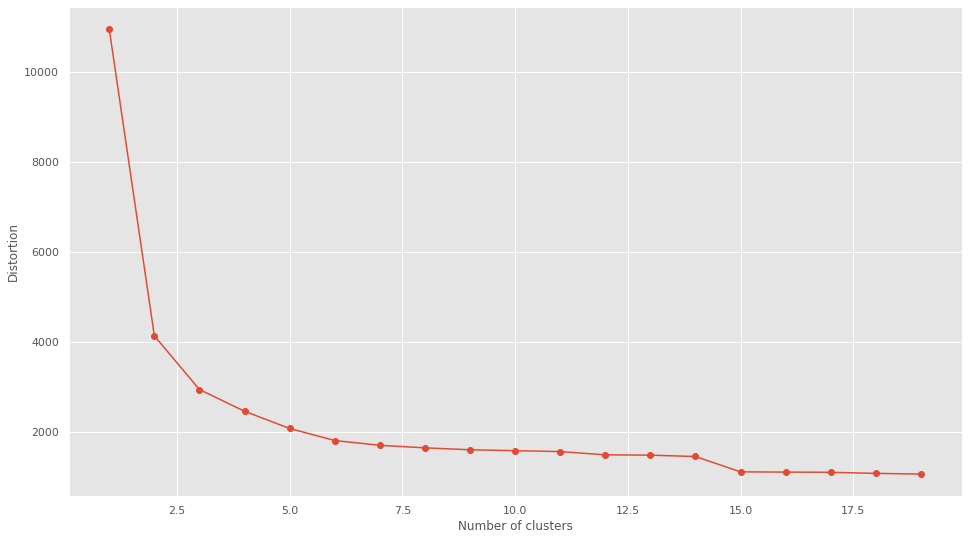

the optimal number of clusters is 3


In [37]:
n_clusters = elbow_test(X_std, 10, 20, 5)

print(f'the optimal number of clusters is {n_clusters}')

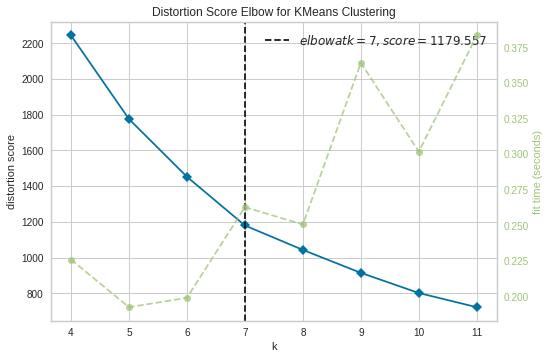

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_std)       
visualizer.show() 

In [39]:
clt = KMeans(n_clusters=7, random_state=0, n_jobs=-1)
model = clt.fit(X_std)

In [40]:
n_clusters = 7
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(n_clusters)
mi_df['cluster'] = lut[model.labels_]

In [42]:
c_0 = mi_df[mi_df['cluster']==0]
c_1 = mi_df[mi_df['cluster']==1]
c_2 = mi_df[mi_df['cluster']==2]
c_3 = mi_df[mi_df['cluster']==3]
c_4 = mi_df[mi_df['cluster']==4]
c_5 = mi_df[mi_df['cluster']==5]
c_6 = mi_df[mi_df['cluster']==6]

In [43]:
print(f'Longitud c_0: {len(c_0)}, c_1: {len(c_1)}, c_2: {len(c_2)}, c_3: {len(c_3)}, c_4: {len(c_4)},  c_5: {len(c_5)},  c_6: {len(c_6)}')

Longitud c_0: 2935, c_1: 885, c_2: 759, c_3: 525, c_4: 291,  c_5: 73,  c_6: 9


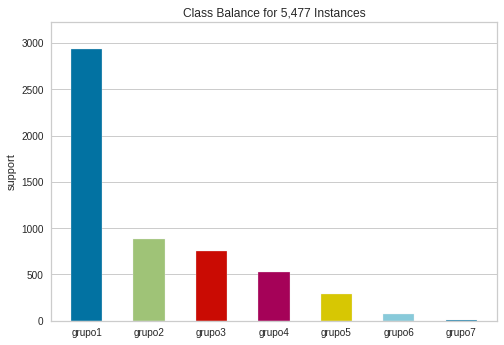

<AxesSubplot:title={'center':'Class Balance for 5,477 Instances'}, ylabel='support'>

In [44]:
X = df_ex
y = lut[model.labels_]
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels = ['grupo1', 'grupo2', 'grupo3', 'grupo4', 'grupo5', 'grupo6', 'grupo7'])
visualizer.fit(y)
visualizer.show()

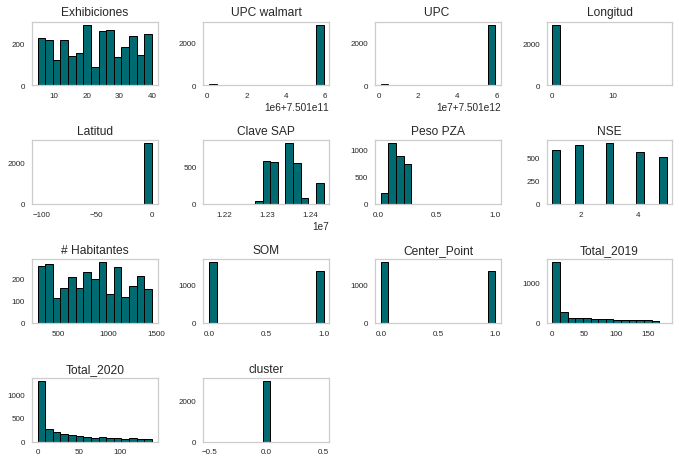

In [46]:
c_0.hist(bins=15, color='#006a71', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

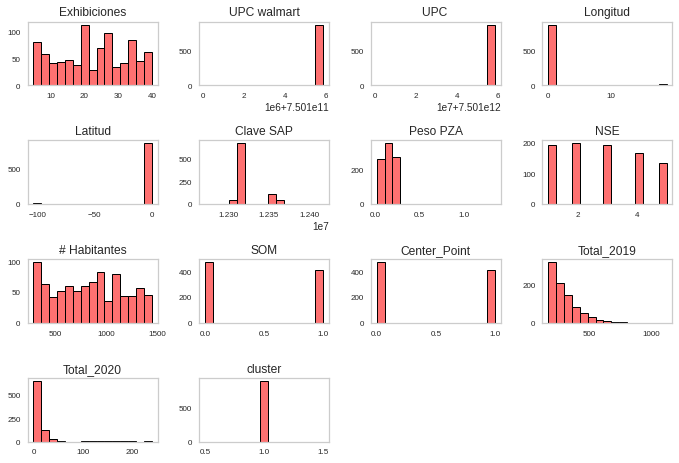

In [47]:
c_1.hist(bins=15, color='#fe7171', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

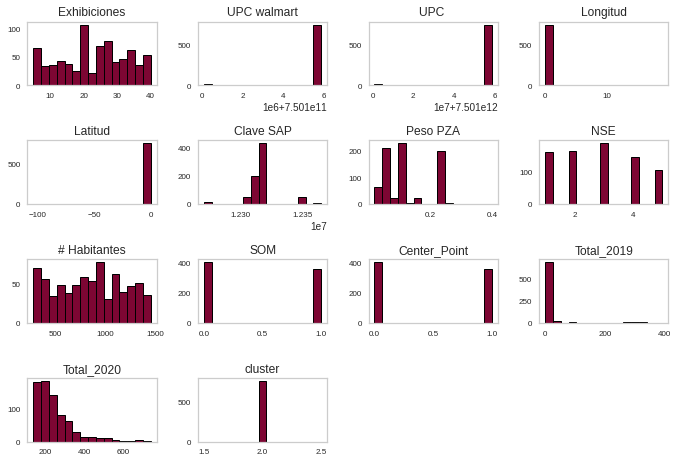

In [48]:
c_2.hist(bins=15, color='#7d0633', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

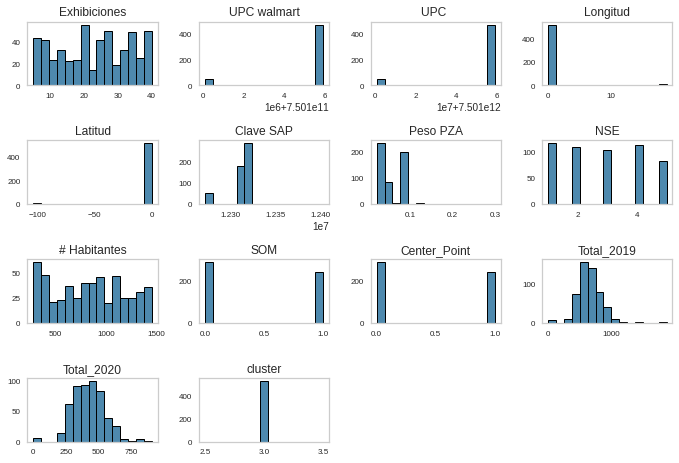

In [49]:
c_3.hist(bins=15, color='#4e89ae', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

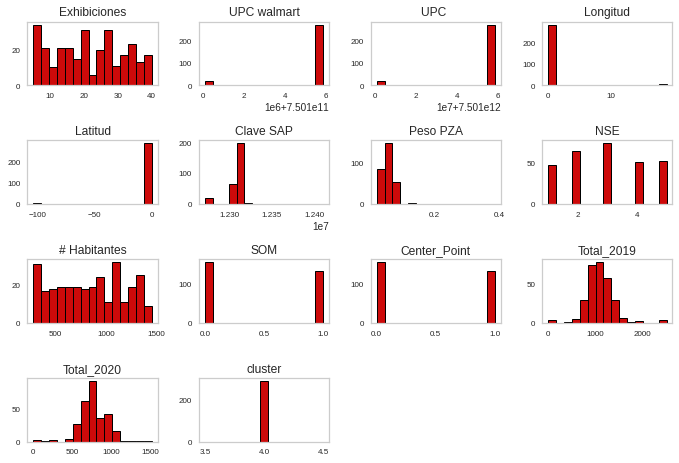

In [50]:
c_4.hist(bins=15, color='#cd0a0a', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

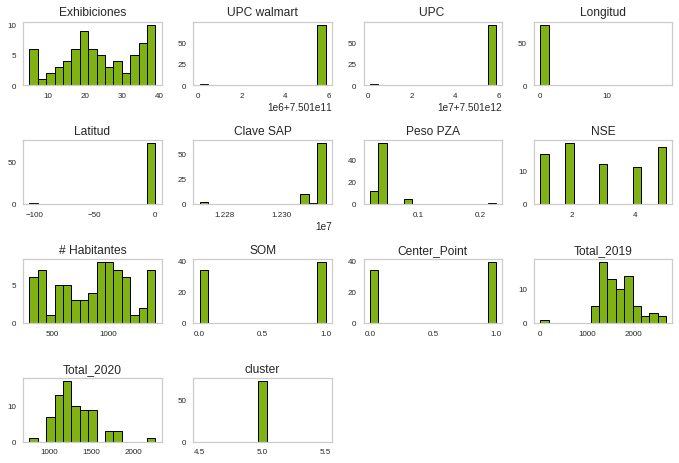

In [51]:
c_5.hist(bins=15, color='#81b214', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

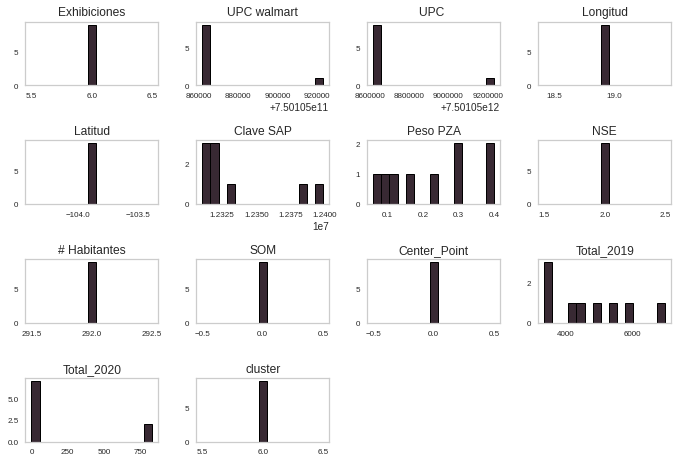

In [52]:
c_6.hist(bins=15, color='#382933', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

In [53]:
c_0_ceros19 = c_0.query('Total_2019 == 0')
c_0_ceros19

,Data_Type,Region_Nestle,Clasificacion_Store_Optimizer,Store_Name,Exhibiciones,UPC walmart,UPC,Estado,Longitud,Latitud,...,Marca,Division,NSE,# Habitantes,Formato,SOM,Center_Point,Total_2019,Total_2020,cluster
15,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105863281,7501058632814,Queretaro,0.000000,0.000000,...,Nescafé Clásico,F&B,3,953,Bodega,0,0,0.0,30.0,0
32,POS Qty,Occidente,Resto,BAE PLAZA ARIEL,20,750105862917,7501058629173,Queretaro,0.000000,0.000000,...,Nescafé Cappuccino,F&B,4,1429,Bodega,1,1,0.0,5.0,0
33,POS Qty,Occidente,Resto,BAE PLAZA ARIEL,20,750105862917,7501058629173,Queretaro,0.000000,0.000000,...,Nescafé Cappuccino,F&B,4,1429,Bodega,1,1,0.0,1.0,0
35,POS Qty,Occidente,Resto,BAE PLAZA ARIEL,20,750105863281,7501058632814,Queretaro,0.000000,0.000000,...,Nescafé Clásico,F&B,4,1429,Bodega,1,1,0.0,44.0,0
38,POS Qty,Occidente,Resto,BAE SAN RAFAEL ZAMORA,17,750100091260,7501000912605,Michoacan,0.000000,0.000000,...,Nescafé Dolca,F&B,1,310,Bodega,1,1,0.0,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,POS Qty,Occidente,Resto,BA TECOMAN,6,750105862846,7501058628466,Colima,18.921301,-103.883102,...,Nescafé Decaf,F&B,2,292,Bodega,0,0,0.0,116.0,0
5449,POS Qty,Occidente,Resto,BA TECOMAN,6,750105862915,7501058629159,Colima,18.921301,-103.883102,...,Nescafé Cappuccino,F&B,2,292,Bodega,0,0,0.0,120.0,0
5451,POS Qty,Occidente,Resto,BA TECOMAN,6,750105862917,7501058629173,Colima,18.921301,-103.883102,...,Nescafé Cappuccino,F&B,2,292,Bodega,0,0,0.0,53.0,0
5463,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864131,7501058641311,Colima,18.921301,-103.883102,...,Nescafé Dolca,F&B,2,292,Bodega,0,0,0.0,47.0,0


In [54]:
c_0_ceros = c_0.query('Total_2020 == 0')
c_0_ceros

,Data_Type,Region_Nestle,Clasificacion_Store_Optimizer,Store_Name,Exhibiciones,UPC walmart,UPC,Estado,Longitud,Latitud,...,Marca,Division,NSE,# Habitantes,Formato,SOM,Center_Point,Total_2019,Total_2020,cluster
0,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861647,7501058616470,Queretaro,0.000000,0.000000,...,Nescafé Decaf,F&B,3,953,Bodega,0,0,61.0,0.0,0
13,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105862917,7501058629173,Queretaro,0.000000,0.000000,...,Nescafé Cappuccino,F&B,3,953,Bodega,0,0,6.0,0.0,0
14,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105863281,7501058632814,Queretaro,0.000000,0.000000,...,Nescafé Clásico,F&B,3,953,Bodega,0,0,50.0,0.0,0
16,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105863928,7501058639288,Queretaro,0.000000,0.000000,...,Nescafé Clásico,F&B,3,953,Bodega,0,0,12.0,0.0,0
19,POS Qty,Occidente,Resto,BAE PLAZA ARIEL,20,750105861647,7501058616470,Queretaro,0.000000,0.000000,...,Nescafé Decaf,F&B,4,1429,Bodega,1,1,87.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,POS Qty,Occidente,Resto,BA TECOMAN,6,750105863166,7501058631664,Colima,18.921301,-103.883102,...,Reserva Mexicana,F&B,2,292,Bodega,0,0,80.0,0.0,0
5460,POS Qty,Occidente,Resto,BA TECOMAN,6,750105863165,7501058631657,Colima,18.921301,-103.883102,...,Reserva Mexicana,F&B,2,292,Bodega,0,0,63.0,0.0,0
5464,POS Qty,Occidente,Resto,BA TECOMAN,6,750105928462,7501059284623,Colima,18.921301,-103.883102,...,Nescafé Clásico,Professional,2,292,Bodega,0,0,66.0,0.0,0
5466,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864207,7501058642073,Colima,18.921301,-103.883102,...,Reserva Mexicana,F&B,2,292,Bodega,0,0,126.0,0.0,0


In [55]:
df_0 = (c_0
 .groupby(['NSE'])
 .agg({'Total_2019': 'sum'})
 .rename(columns={'Total_2019':'Total_2019_sum'})
 .head(10)
)

df_0 = df_0.reset_index()
df_0

,NSE,Total_2019_sum
0,1,20710.0
1,2,23067.0
2,3,23040.0
3,4,19506.0
4,5,18206.0


In [56]:
df_1 = (c_0
 .groupby(['NSE'])
 .agg({'Total_2020': 'sum'})
 .rename(columns={'Total_2020':'Total_2020_sum'})
 .head(10)
)
df_1 = df_1.reset_index()
df_1

,NSE,Total_2020_sum
0,1,19012.0
1,2,21248.0
2,3,21128.0
3,4,18409.0
4,5,15574.0


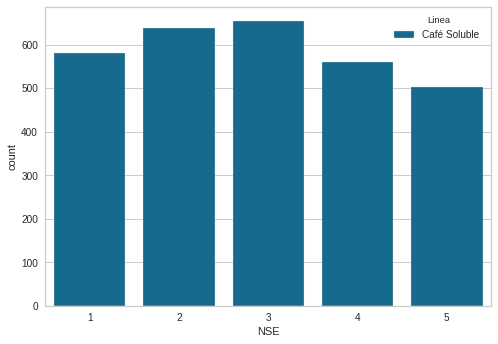

In [57]:
cp = sns.countplot(x="NSE", hue='Linea', data = c_0)

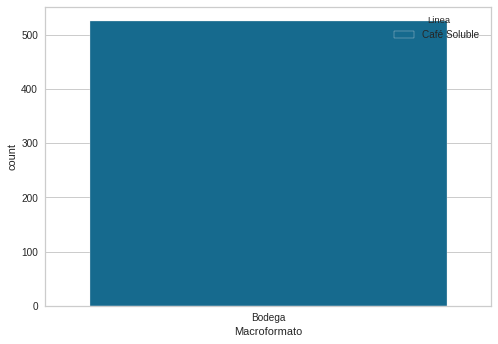

In [58]:
cp = sns.countplot(x="Macroformato", hue='Linea', data = c_3)

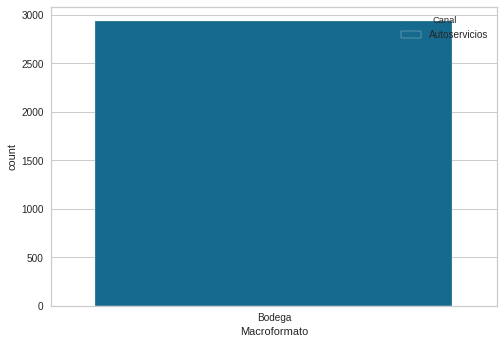

In [61]:
cp = sns.countplot(x="Macroformato", hue='Canal', data = c_0)

In [62]:
c_0

,Data_Type,Region_Nestle,Clasificacion_Store_Optimizer,Store_Name,Exhibiciones,UPC walmart,UPC,Estado,Longitud,Latitud,...,Marca,Division,NSE,# Habitantes,Formato,SOM,Center_Point,Total_2019,Total_2020,cluster
0,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861647,7501058616470,Queretaro,0.000000,0.000000,...,Nescafé Decaf,F&B,3,953,Bodega,0,0,61.0,0.0,0
1,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105861647,7501058616470,Queretaro,0.000000,0.000000,...,Nescafé Decaf,F&B,3,953,Bodega,0,0,10.0,19.0,0
8,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105862009,7501058620095,Queretaro,0.000000,0.000000,...,Nescafé Clásico,F&B,3,953,Bodega,0,0,5.0,97.0,0
13,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105862917,7501058629173,Queretaro,0.000000,0.000000,...,Nescafé Cappuccino,F&B,3,953,Bodega,0,0,6.0,0.0,0
14,POS Qty,Occidente,Resto,BAE PLAZA BELEN,16,750105863281,7501058632814,Queretaro,0.000000,0.000000,...,Nescafé Clásico,F&B,3,953,Bodega,0,0,50.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,POS Qty,Occidente,Resto,BA TECOMAN,6,750105928462,7501059284623,Colima,18.921301,-103.883102,...,Nescafé Clásico,Professional,2,292,Bodega,0,0,66.0,0.0,0
5466,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864207,7501058642073,Colima,18.921301,-103.883102,...,Reserva Mexicana,F&B,2,292,Bodega,0,0,126.0,0.0,0
5467,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864208,7501058642080,Colima,18.921301,-103.883102,...,Reserva Mexicana,F&B,2,292,Bodega,0,0,109.0,0.0,0
5473,POS Qty,Occidente,Resto,BA TECOMAN,6,750105864257,7501058642578,Colima,18.921301,-103.883102,...,Nescafé Tasters Choice,F&B,2,292,Bodega,0,0,0.0,10.0,0
